# Classifying Heart Disease


![heart](https://images.unsplash.com/photo-1530026405186-ed1f139313f8?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=774&q=80)

### Table of Contents

* [Introduction](#Introduction)
    * [Predictive Variables](#Pred)
    * [Outcome Variable](#Out)
* [Import Libraries](#Lib)
* [Exploring the Dataset](#Data)
    * [Broad Findings from Violin Charts](#Vio)
* [Transforming the Data](#Trans)
    * [Overall Findings from Catagorical Pie Charts](#Pie)
* [Correlations](#Corr)
    * [Correlations DataFrame](#CD)
    * [Top 5 Correlations to Angiographic Disease](#CAD)
* [Split-Apply-Combine Table](#Split)
    * [Top 5 features by Split-Apply-Combine](#SAP)
* [Dividing Data and Initial Model](#Divide)
* [Optimizing Number of Features](#Opt)
    * [Accuracy/Total_Iterations vs Number of Features Plot Results](#Plot)
* [Hyperparameter Tuning](#Hyper)
* [Final Model](#Final)
* [Conclusion](#Con)


<a id='Introduction'></a>
## Introduction

[Coronary artery disease](https://en.wikipedia.org/wiki/Coronary_artery_disease) is a heart condition involving a reduction of blood flow into the heart caused by the narrowing of blood vessels due to the build up of [atherosclerotic plaque](https://en.wikipedia.org/wiki/Atherosclerotic_plaque).  This heart disease is the most common type and if blockage becomes severe enough can lead to heart attacks/failure.  

The goal of this project is to build a model using classification with logistic regression to predict the probability of coronary heart disease in a patient.

Source for the data used in this project is from [Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) from the UCI Machine Learning Repository.  Dataset contains the following features: 

<a id='Pred'></a>
### Predictive Variables
* age: age in years

* sex: gender
    * Value 0: female
    * Value 1: male
<br>
<br>
* cp: chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
<br>
<br>
* trestpbs: resting blood pressure (in mm Hg on admission to the hospital)

* chol: serum cholestoral in mg/dl

* fbs: (fasting blood sugar > 120 mg/dl) 
    * Value 0: false
    * Value 1: true
<br>
<br>
* restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
<br>
<br>
* thalach: maximum heart rate achieved

* exang: exercise induced angina
    * Value 0: no
    * Value 1: yes
<br>
<br>
* oldpeak: ST depression induced by exercise relative to rest

* slope: the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
<br>
<br>
* ca: number of major vessels (0-3) colored by flourosopy

* thal: 
    * Value 3: normal
    * Value 6: fixed defect
    * Value 7: reversable defect
<br>
<br>
<a id='Out'></a>
### Outcome Variable

* present: diagnosis of heart disease (angiographic disease status)
     
     * Value 0: < 50% diameter narrowing
     * Value 1: > 50% diameter narrowing

<a id='Lib'></a>
## Import libraries

Import libraries needed for project.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

# set seaborn theme
sns.set_theme()      

<a id='Data'></a>
## Exploring the Dataset

Initial exploriation of dataset for any obvious anomalies.

In [2]:
# format csv file into pandas dataset
heart=pd.read_csv('heart_disease.csv')
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


'Unnamed: 0' column serves the same purpose as an index and will be dropped.  

'ca' and 'thal' data are formated as *strings*.  'ca' data is ordinal and can be converted to numerical values without causing issue.  'Thal' values in dataset are nominal and need to be kept as catagorical data.

The following columns are also nominal in nature and will need to be converted to catagorical data:

* cp
* slope
* thal

There are no null values.

In [3]:
# drop Unnamed:0 column due to column being identical to the heart dataframe index values
heart_modif=heart.drop(columns='Unnamed: 0' )

# transform 'ca' column to numeric
heart_modif['ca']=pd.to_numeric(heart_modif['ca'], errors='ignore')

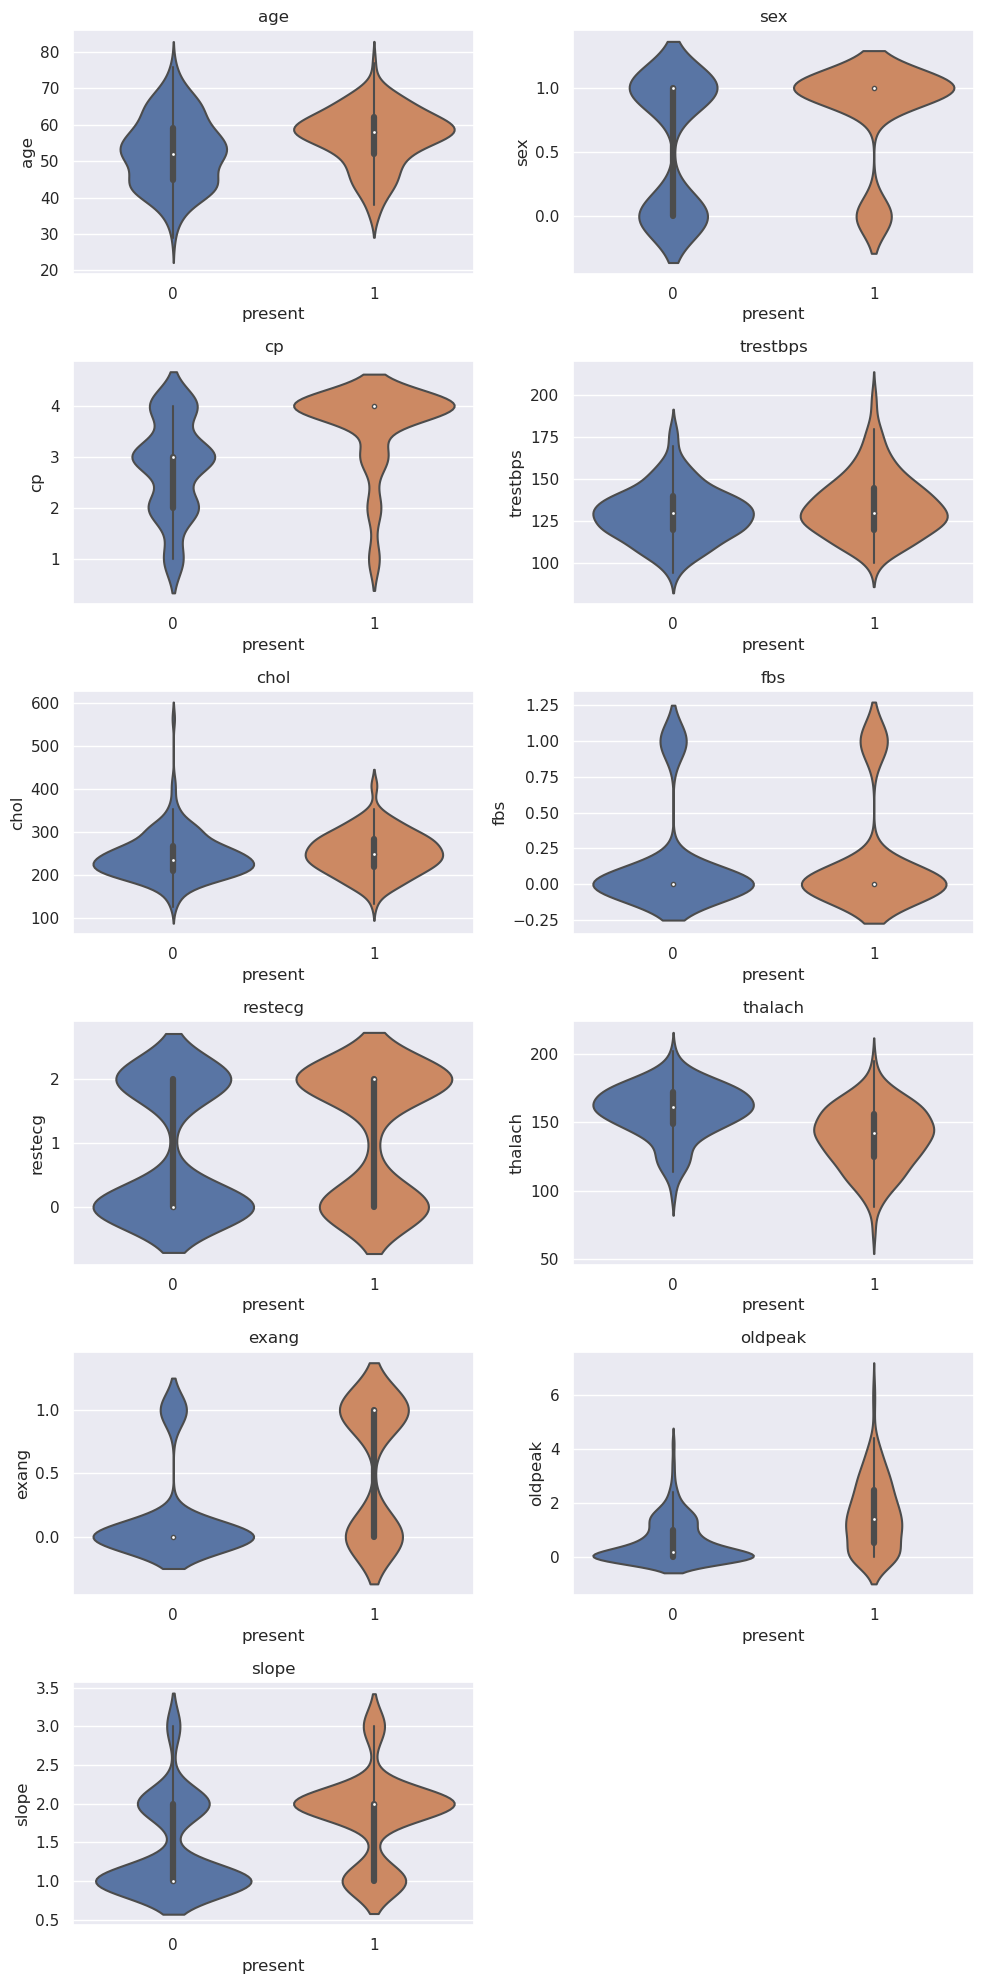

In [4]:
# create seperate dataset for violin plots minus columns formated as string and outcome variable
box=heart_modif.iloc[:,:-3]

# copy of heart_modif dataset and converting outcome variable as string for use in violin plots
heart_box=heart_modif.copy()
heart_box['present']=heart_box['present'].astype(str)

# set figure size
plt.figure(figsize=(10,20))

# loop through list of columns in box dataset and plot distributions of predictor features in patients with and without disease
for i, col in enumerate(box.columns):
    plt.subplot(6,2,i+1)
    sns.violinplot(data=heart_box, y=col, x='present')
    plt.title(col)
plt.tight_layout()
plt.show()

<a id='Vio'></a>
### Broad Findings from Violin Charts

* age: patients with the disease tend to skew older
* sex: males tend to be more likely to have the disease
* cp (chest pain): asymptomatic chest pain is overly represented amoung patients with the disease
* trestbps (resting blood pressure): blood pressure is fairly similar although the max resting blood pressures are in the group with the heart disease
* chol (cholesteral): distribution is also similar between those with the disease both with a mean below 300 mg/dl
* fbs (fasting blood sugar): distribution between patients with the heart disease and those without looks fairly similart 
* restecg (resting electrocardiographic): Individuals without the disease tend to *normal* results.  Those with the disease are more likely to have'probable or definite left ventricular hypertrophy by Estes' criteria.'
* thalach (maximum heart rate achieved): patients without the disease tend to have a higher maximum heart rate
* exang (exercise induced angina): patients without the disease rarely suffer from exercise induce angina while patients with the disease are much more likely
* oldpeak (ST depression induced by exercise relative to rest): patients with the disease tend to have elevated oldpeak levels
* slope (slope of the peak exercise ST segment): patients with the disease tend to have a flat slope; patients without the disease tend to have an upsloping slope

<a id='Trans'></a>
## Transforming the Data

Next will return catagorical data marked by numerical values back to the catagories those numbers actually represent.  Afterwards will convert the catagorical data into dummy variables to be usuable by the logistic regression model later on.  The reason for doing this is that the original numerical values poorly convey value as they are.  For example there is nothing that suggests a useful scale of the 1-4 values in the column related to chest-pain.  An '1' value (typical angina) is not inherently better/worse than a '4' value (asymptomatic) in the chest-pain column.  

The 'ca' column is set to *string* type and needs to be returned to numerical values.  These values are related to (number of major vessels (0-3) colored by flourosopy).

In [5]:
# create dictionary of the numerical values to the proper catagorical values
cp_dic={1:'typical angina', 2: 'atypical angina', 3: 'non-anginal pain', 4: 'asymptomatic'}
slope_dic={1: 'upsloping', 2: 'flat', 3: 'downsloping'}
thal_dic={'3.0': 'normal', '7.0': 'reversable defect', '6.0': 'fixed defect', '?': 'unknown'}

# map dictionaries created above to values in the catagorical columns
heart_modif['cp']=heart_modif['cp'].map(cp_dic)
heart_modif['slope']=heart_modif['slope'].map(slope_dic)
heart_modif['thal']=heart_modif['thal'].map(thal_dic)



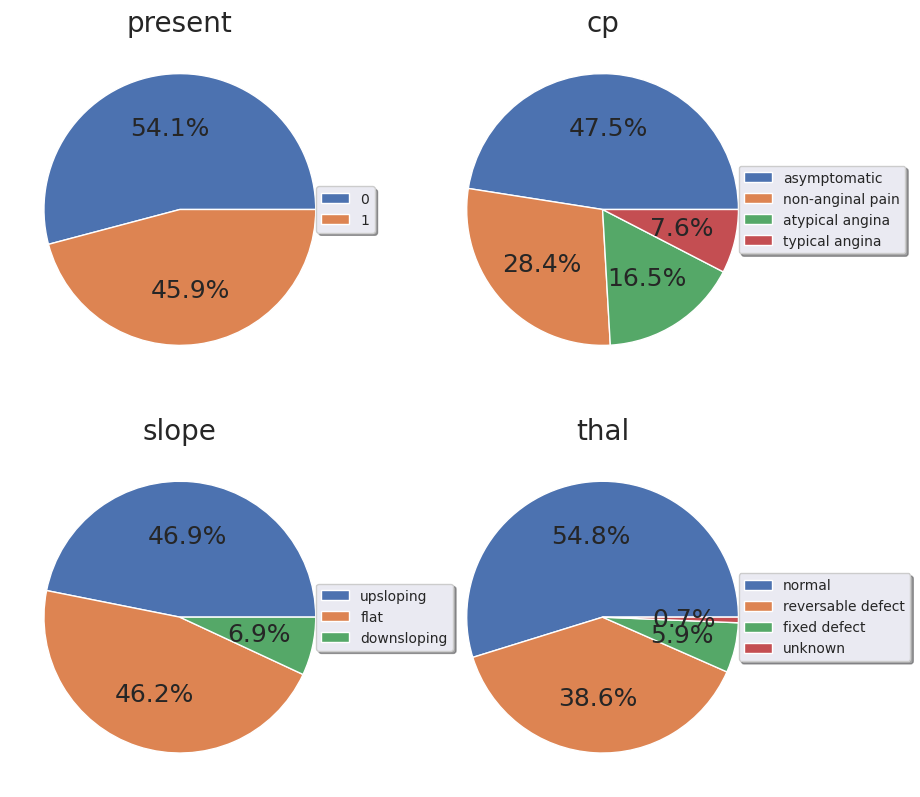

In [6]:
# pie charts of binary features percentage of the total dataset
cat=['present','cp', 'slope', 'thal']

# set figure size
plt.figure(figsize=(10,15))

# loop through catagorical columns and generate pie charts
for i, cat in enumerate(cat):
    plt.subplot(3,2,i+1)
    heart_modif[cat].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', labeldistance=None,textprops={'fontsize': 18})
    plt.title(f'{cat}', fontsize=20)                                                    
    plt.ylabel('')  
    plt.legend(fancybox=True, shadow=True, loc='center left', bbox_to_anchor=(0.88, 0.5), fontsize=10)
plt.show() 

<a id='Pie'></a>
### Overall Findings from Catagorical Pie Charts

* roughly 55/45 ratio of patients without the disease to patients with the disease
* asymptomatic chest pain makes up almost 50% of dataset with typical angina taking up less than 8%
* upsloping and flat are at a 1:1 ratio with a sliver of less than 7% of the dataset having downsloping
* most patients either have no defect or a reversable defect

In [7]:
# create dummy variables out of the created catagorical columns
heart_modif=pd.get_dummies(heart_modif)

# print information on all columns now in dataset
heart_modif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     303 non-null    int64  
 1   sex                     303 non-null    int64  
 2   trestbps                303 non-null    int64  
 3   chol                    303 non-null    int64  
 4   fbs                     303 non-null    int64  
 5   restecg                 303 non-null    int64  
 6   thalach                 303 non-null    int64  
 7   exang                   303 non-null    int64  
 8   oldpeak                 303 non-null    float64
 9   present                 303 non-null    int64  
 10  cp_asymptomatic         303 non-null    uint8  
 11  cp_atypical angina      303 non-null    uint8  
 12  cp_non-anginal pain     303 non-null    uint8  
 13  cp_typical angina       303 non-null    uint8  
 14  slope_downsloping       303 non-null    ui

<a id='Corr'></a>
## Correlations

Next goal is to determine which features correlate the strongest with angiographic disease status. 

First generate *Pearson's Correlation Heatmap.*

Text(0.5, 1.0, "Pearson's Correlation Chart")

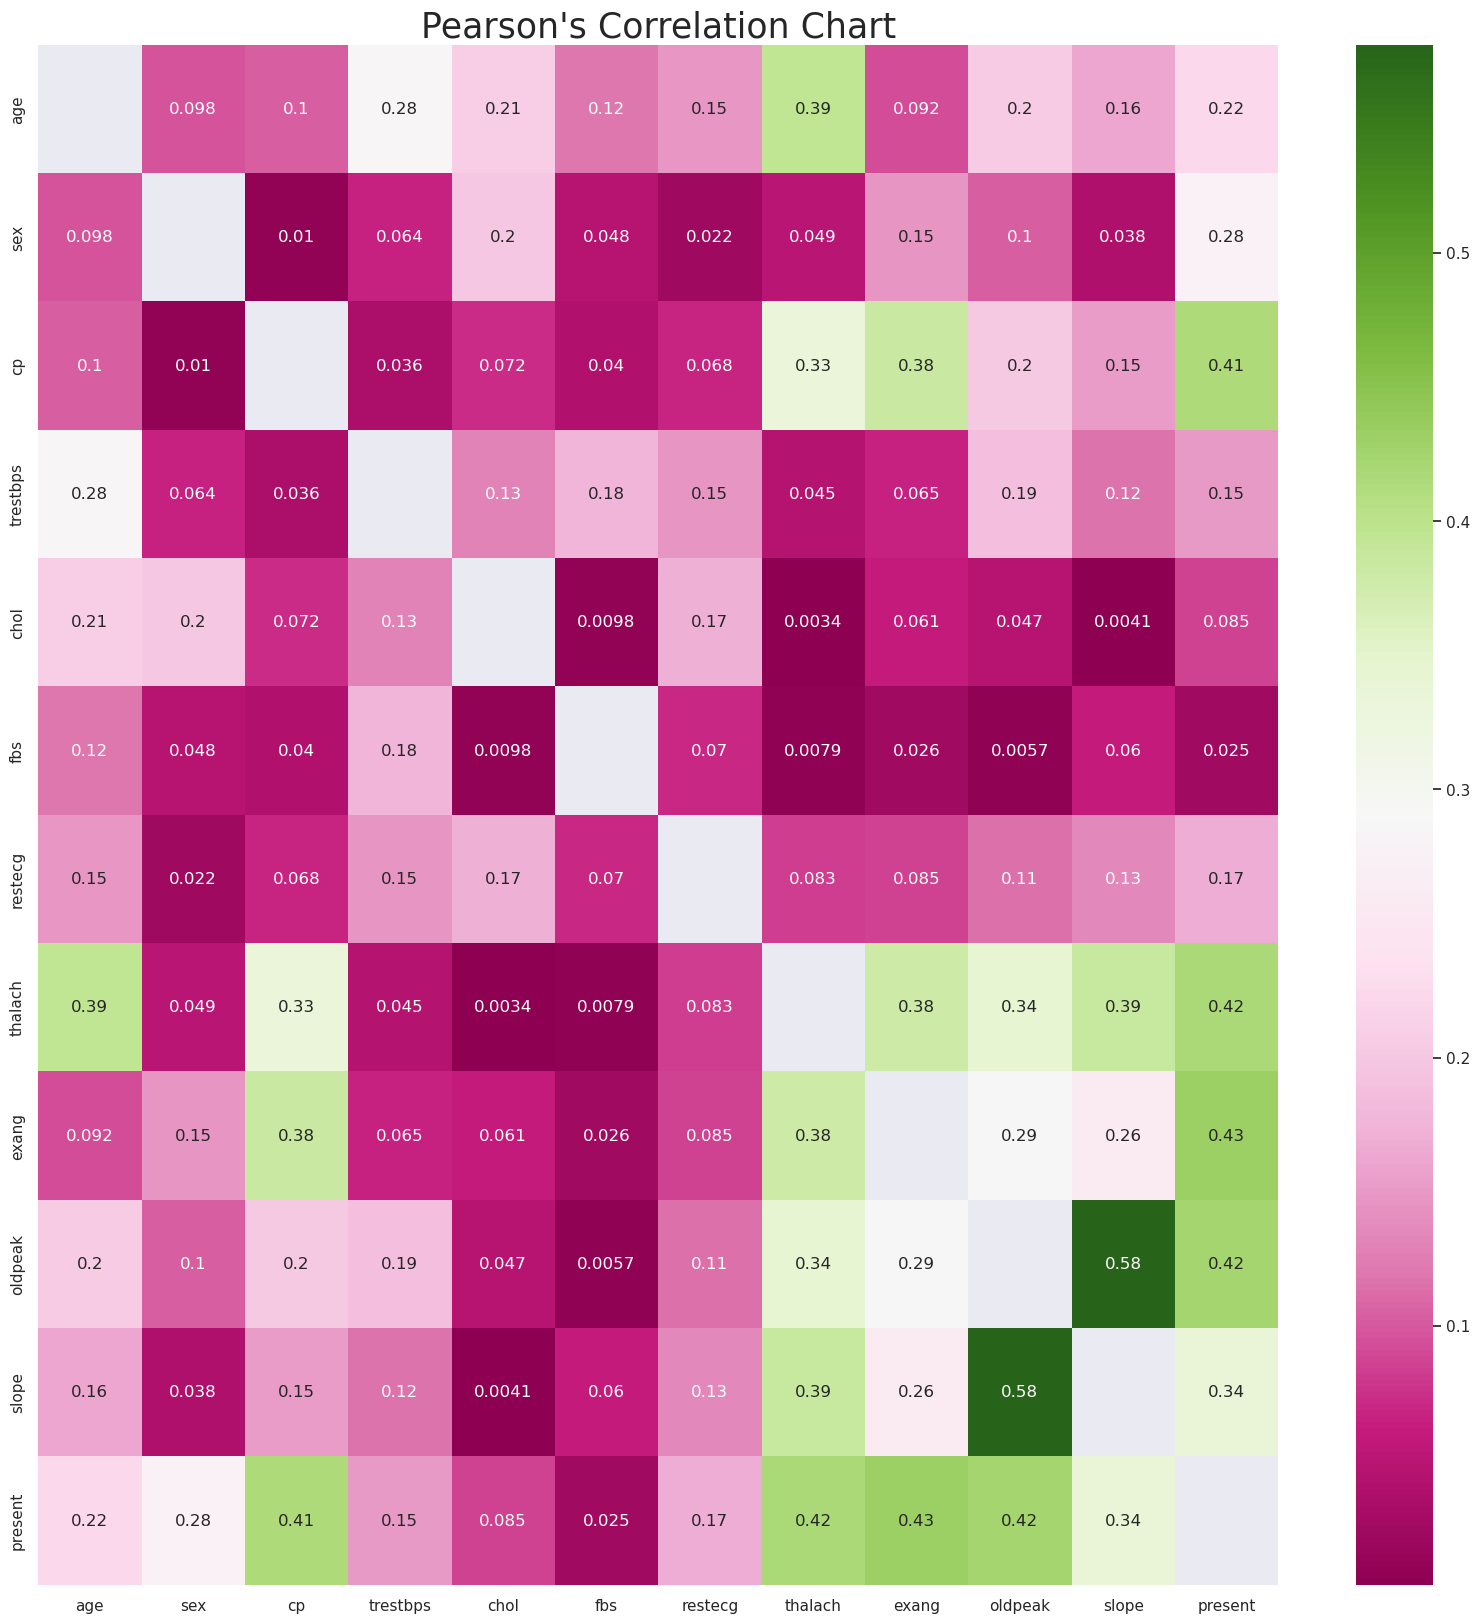

In [8]:
# create correlations
plt.figure(figsize=(20,20))
corr=abs(heart.drop(columns='Unnamed: 0').corr())

# plot correlations
sns.heatmap(corr[corr<1], cmap="PiYG", annot=True)
plt.title("Pearson's Correlation Chart", fontsize=25) 

This first chart uses the original dataframe before cleanup and creation of dummy variables.  The heart_modif dataframe contains twice the amount of variables and would be very unweildy using the chart created above.

Top 5 Features by Correlation to Disease from above chart:

* exang: 0.43
* oldpeak: 0.42
* thalach: 0.42
* cp: 0.41
* slope: 0.34
<a id='CD'></a>
### Correlations DataFrame


Text(0.5, 0, '')

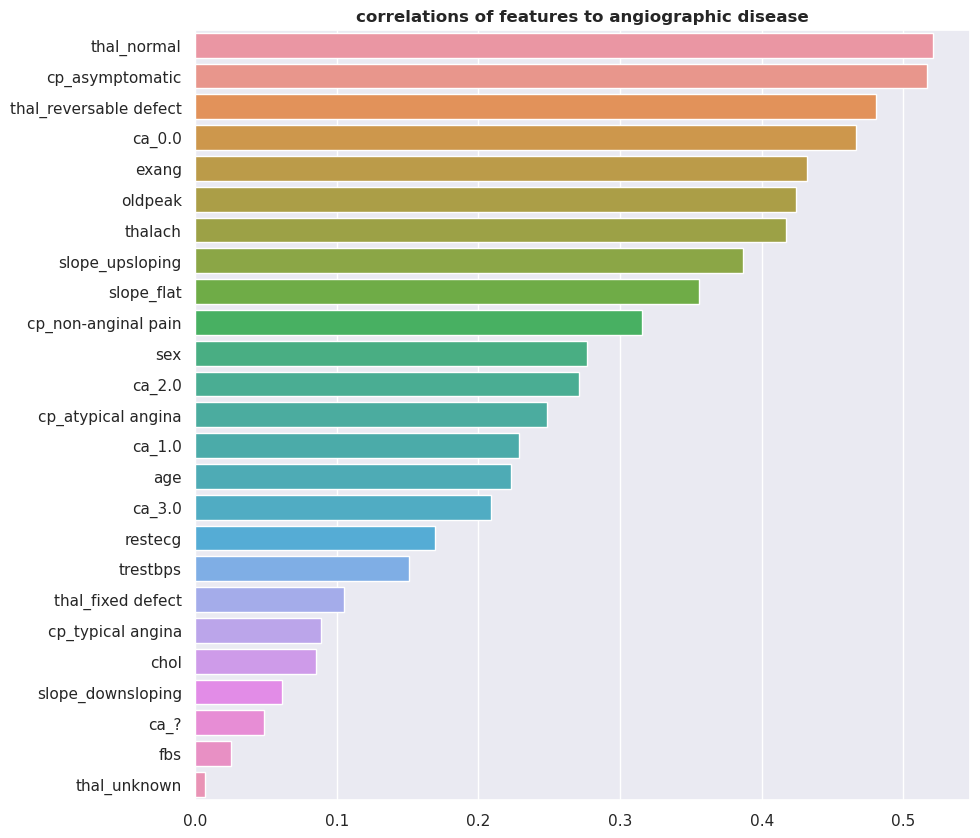

In [9]:
# create correlations dataframe from heart_modif
correlations=abs(heart_modif.corr())

# sort_values based off of 'present' column from largest to smallest
correlations=correlations.sort_values('present', ascending=False)

# drop index named 'present'
correlations=correlations.drop('present')

# figure size
plt.figure(figsize=(10,10))

# plot horizantal barplot of correlations
sns.barplot(y=correlations.index, x=correlations['present'], orient='h')
plt.title('correlations of features to angiographic disease', weight='bold')
plt.xlabel('')

<a id='CAD'></a>
### Top 5 Correlations to Angiographic Disease:

* thal_normal: 0.52
* cp_asymptomatic: 0.52
* thal_reversable defect: 0.48
* ca_0.0: 0.47
* exang: 0.43

The order of the features determined by correlation of disease will be used again in the future models.

<a id='Split'></a>
## Split-Apply-Combine Table

Next we will look at another way of prioritizing features for the data model by creating a split-apply-table.
<br>
<br>
* Splitting the data into groups based on some criteria.
    * In this case, angiographic disease status
<br>
<br>
* Applying a function to each group independently.
    * Apply 'mean' agg_func to the variables
<br>
<br>
* Combining the results into a data structure.
    * Compare differences in values generated by agg_function with pct_change method
<br>

In [10]:
# Create function to determine optimal features to use via a split-apply-combine table

def split_apply_combine(df, outcome='present', agg_func='mean'):
    
    # create copy of dataframe with only predictor variables
    predictors=df.copy().drop(columns=outcome)
    # create empty dictionary for agg method
    agg_dict={}
    
    # loop through predictors list and assign agg_func value to predictor key values
    for p in predictors:
        agg_dict[p]=agg_func
    
    # generate table from dataframe grouped by outcome and aggregated with operations with given predictors
    split_table=df.groupby(outcome).agg(agg_dict)
    
    # transpose table to make easier to use
    split_table=split_table.transpose()
    
    # create percent_difference column and sort by absolute percentage change
    split_table['percent_difference']=abs(split_table.pct_change(axis=1)[1]*100)
    
    # sort table by 'percent_difference' largest to smallest value
    split_table=split_table.sort_values('percent_difference', ascending=False)
    return split_table

split_table=split_apply_combine(heart_modif)

In [11]:
split_table.head()

present,0,1,percent_difference
ca_3.0,0.018293,0.122302,568.585132
ca_2.0,0.042683,0.223022,422.507708
exang,0.140244,0.546763,289.865499
thal_reversable defect,0.170732,0.640288,275.025694
cp_asymptomatic,0.237805,0.755396,217.653569


<a id='SAP'></a>
### Top 5 features by Split-Apply-Combine

* ca_3.0: 568.59%
* ca_2.0: 422.51%
* exang: 289.87%
* thal_reversable defect: 275.03
* cp_asymptomatic: 217.65

Order of features determined by split-apply-combine will be used in future models

Text(0.5, 1.0, 'abs difference of features by mean regarding angiographic disease status')

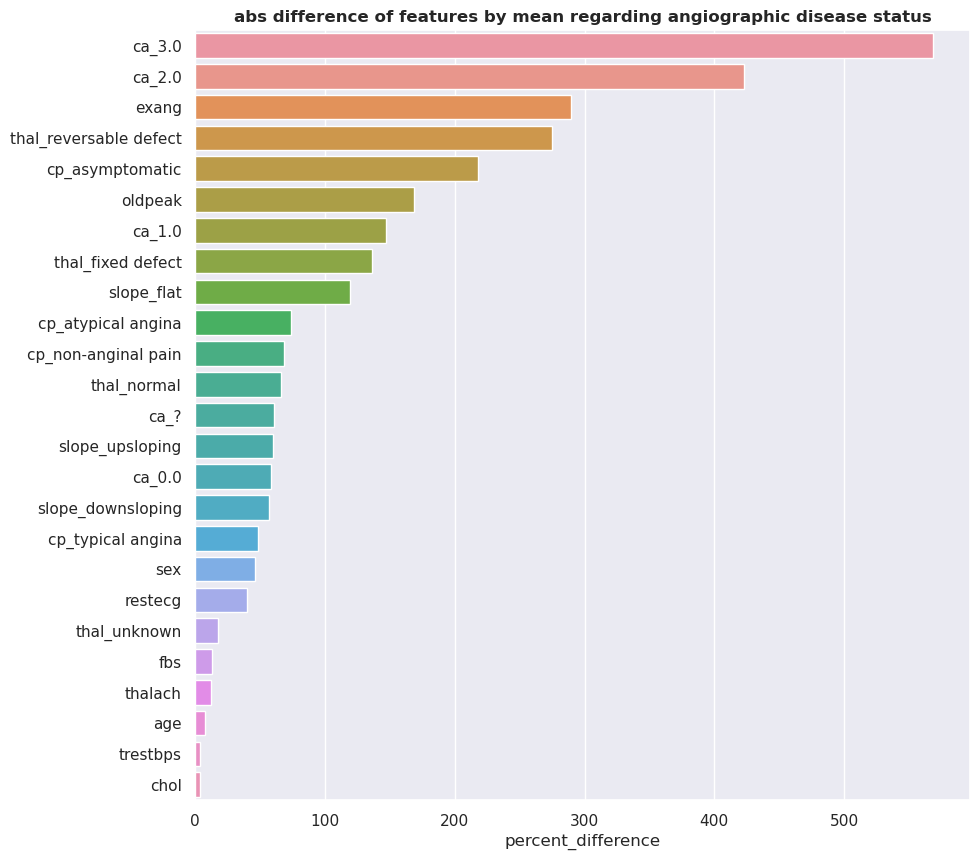

In [12]:
plt.figure(figsize=(10,10))
sns.barplot(y=split_table.index, x='percent_difference', data=split_table, orient='h')
plt.title('abs difference of features by mean regarding angiographic disease status', weight='bold')

<a id='Divide'></a>
## Divide Data and Initial Model

Next we will divide the data for initial testing into train and testing datasets.  Afterwards will run two seperate models each with a different order of features determined by correlation or split-apply-combine.  Initially each model will only use three features.

In [13]:
# select top 3 features determined by split-apply-combine table
feat_split=split_table.index[:3]
feat_corr=correlations.index[:3]

# split data into predictor and outcome variables
X=heart_modif.drop(columns='present')
y=heart_modif['present']

# split data into train and test datasets using train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.33, random_state=37)

In [14]:
# generate model object with set random_state for repeatable results
model = LogisticRegression(random_state=37)
model2 = LogisticRegression(random_state=37)

# fit model with training data
model.fit(X_train[feat_split], y_train)
model2.fit(X_train[feat_corr], y_train)

# calculate accuracy of model and print results
score=model.score(X_train[feat_split], y_train)
score2=model2.score(X_train[feat_corr], y_train)

print(f'Initial accuracy of the model with features selected by split-apply-combine is {score*100:.2f}%')
print(f'Initial accuracy of the model with features selected by correlations is {score2*100:.2f}%')

Initial accuracy of the model with features selected by split-apply-combine is 75.86%
Initial accuracy of the model with features selected by correlations is 76.85%


Accuracy using the first three largest values of features whose order is determined by correlations or split-apply-combine tables are very similar to each other.  For now, we will proceed using both and determine which is overall better by increasing features and examining how much iterations increase with increased features. 

<a id='Opt'></a>
## Optimizing Number of Features

In [15]:
# create empty dictionaries for features
features={}
features_corr={}

# loop through index to create dictionary with increasing amounts of features selected through each iteration
for i in range(len(correlations.index)):
    features[i]=split_table.index[:(i+1)]
    features_corr[i]=correlations.index[:(i+1)]

# create empty dictionary for n_iters and accuracy
n_iters={}    
n_iters_corr={}

accuracy={}
accuracy_corr={}

# loop for features order determined by split_table
for f in features:
    
    # with each iteration the model will be fitted with increasing number of features
    feature = features.get(f)
    model = LogisticRegression(max_iter=10000, random_state=37)
    model.fit(X_train[feature], y_train)
    score=model.score(X_train[feature], y_train) 
    
    # fill dictionaries with appropriate metrics
    n_iters[f]=model.n_iter_
    accuracy[f]=score  

# Loop for features order determined by correlations
for f in features_corr:
    feature = features_corr.get(f)
    model = LogisticRegression(max_iter=10000, random_state=37)
    model.fit(X_train[feature], y_train)
    score=model.score(X_train[feature], y_train) 
    n_iters_corr[f]=model.n_iter_
    accuracy_corr[f]=score     
    

In [16]:
# transform dictionaries for split-apply-combine metrics into dataframes
n_iters_df=pd.DataFrame(index=n_iters.keys(), data=n_iters.values())
accuracy_df=pd.DataFrame(index=accuracy.keys(), data=accuracy.values())
accuracy_df['percent_change']=accuracy_df.pct_change()*100

In [17]:
# transform dictionaries for correlation metrics into dataframes
n_iters_corr_df=pd.DataFrame(index=n_iters_corr.keys(), data=n_iters_corr.values())
accuracy_df_corr=pd.DataFrame(index=accuracy_corr.keys(), data=accuracy_corr.values())
accuracy_df_corr['percent_change']=accuracy_df_corr.pct_change()*100

Next, we will plot the results so we can observe differences when the amount of features in model are increased.   First will generate chart using this [technique](https://towardsdatascience.com/adding-a-third-y-axis-to-python-combo-chart-39f60fb66708).  Left side of chart will have scale for accuracy and the right side will have the scale for total iterations.  

(-1.2000000000000002, 25.2, 0.0, 1300.0)

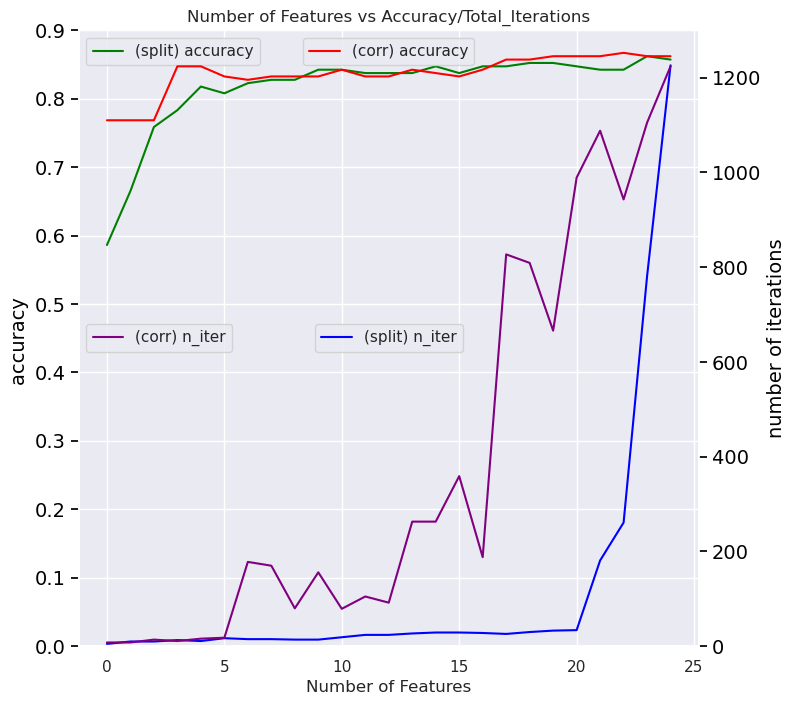

In [18]:
# set figsize
plt.figure(figsize=(8,8))

# set up ax1 (accuracy plot for split-apply-combine feature order)
ax1=sns.lineplot(
    x=accuracy_df.index, 
    y=accuracy_df.iloc[:,0], 
    data=accuracy_df,
    color='green'
)
ax1.set_title('Number of Features vs Accuracy/Total_Iterations')
ax1.set_ylabel('accuracy ')
ax1.set_ylim(0, .9)
ax1.legend(['(split) accuracy'], loc="upper left") #legend title/location
ax1.yaxis.label.set_color('black')
ax1.yaxis.label.set_fontsize(14)
ax1.tick_params(axis='y', labelsize=14, colors='black')
ax1.set_xlabel('Number of Features')

# set up ax2 (n_iter plot for split-apply-combine feature order)
ax2 = ax1.twinx()
sns.lineplot(
    data=n_iters_df,
    x=n_iters_df.index,
    y=n_iters_df.iloc[:,0],
    color='blue', 
    ax = ax2       # Pre-existing axes for the plot
)

ax2.grid(False) # turn off grid #2
ax2.set_ylabel('number of iterations')
ax2.set_ylim(0, 1300)
ax2.legend(['(split) n_iter'], loc="center") #legend title/location
ax2.yaxis.label.set_color('black')
ax2.yaxis.label.set_fontsize(14)
ax2.tick_params(axis='y', colors='black', labelsize=14)

# set up the 3rd axis (accuracy plot for correlation feature order)
ax3 = ax1.twinx()

sns.lineplot(
    x=accuracy_df_corr.index, 
    y=accuracy_df_corr.iloc[:,0], 
    data=accuracy_df_corr, 
    sort=False, 
    color='red', 
    ax = ax3       # Pre-existing axes for the plot
)
ax3.grid(False) # turn off grid #3
ax3.set_ylabel('(corr) accuracy')
ax3.set_ylim(0, .9)
ax3.axis('off')
ax3.legend(['(corr) accuracy'], loc="upper center") #legend title/location

# set up 4th axis (n_iter plot for correlation feature order)
ax4 = ax1.twinx()

sns.lineplot(
    data=n_iters_corr_df,
    x=n_iters_corr_df.index,
    y=n_iters_corr_df.iloc[:,0],
    color='purple', 
    ax = ax4       # Pre-existing axes for the plot
)

ax4.grid(False) # turn off grid #4
ax4.legend(['(corr) n_iter'], loc="center left") #legend title/location
ax4.set_ylim(0, 1300)
ax4.axis('off')

<a id='Plot'></a>
### Accuracy/Total_Iterations vs Number of Features Plot Results

Accuracy using order of features determined by correlation to disease starts off higher than by the order determined by split-apply-combine table.  However by the time the number of features used in model are five or higher the accuracy very similar to one another.  

When you look at the number of iteration lineplots you can see an odd pattern.  The number of iterations using features ordered by the split-apply-combine table are fairly smooth only slowly increasing until the total number of features increase to 20 or higher.  The lineplot correlating to the number of features ordered by correlation to disease is identical until the total number of features increase to five.  Afterwards the plot becomes erratic and significantly higher values than the split-apply-combine plot.

Because the accuracy is so similar after five features; the method that will be used will be determined by the number of iterations which strongly favors the order of features determined by split-apply-combine table.

Now that the feature order has been chosen.  Now will concentrate on what is the optimum number of features.  To do this it would be useful to plot the percentage change of accuracy as features increase.

Text(0.5, 1.0, 'Percent Change of Accuracy With Increasing Number Of Features')

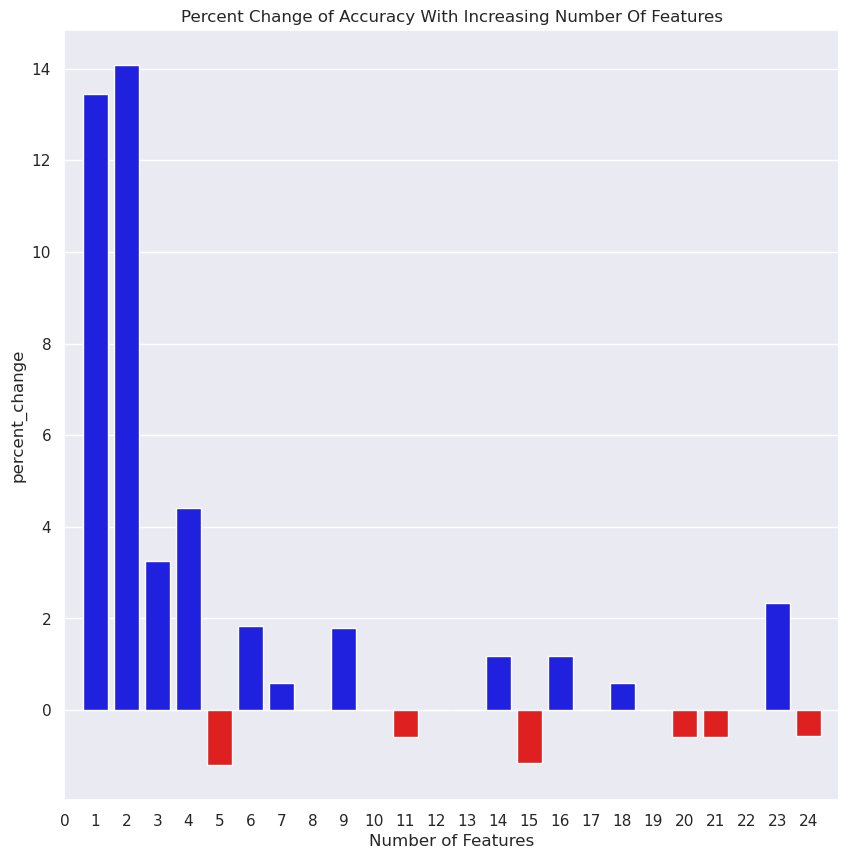

In [19]:
# set up custom palatte dictionary.  Positive values blue. Negative values red.
custom_palette = ['blue']
for q in accuracy_df['percent_change']:    
    if q <= 0:
        custom_palette.append('red')
    elif q > 0:
        custom_palette.append('blue')

# set figure size
plt.figure(figsize=(10,10))

sns.barplot(data=accuracy_df, x=accuracy_df.index, y='percent_change', palette=custom_palette)
plt.xlabel('Number of Features')
# plt.ylim(-2,15)
plt.xlim(0,25)
plt.title('Percent Change of Accuracy With Increasing Number Of Features')

Improvement in accuracy becomes fairly flat after the first ten number of features in split-apply-combine order with many of the instances involving increasing number of features actually lowering accuracy.

<a id='Hyper'></a>
## Hyperparameter Tuning

Next will find the ideal parameters for increasing the accuracy of the model.

In [20]:
# select top ten features determined by split-apply-combine table
feat=split_table.index[:10]

# select various compatible parameters
grid_params = {"penalty": ['none', 'l2'],
                "class_weight": [None, "balanced"], 
               'solver': ['lbfgs', 'newton-cg', 'sag'],
               'multi_class': ['auto', 'ovr', 'multinomial'],
               'fit_intercept' : [True, False]               
              }

# create model object
model = LogisticRegression(max_iter=10000, random_state=37)

# fit model to GridSearchCV object
model_grid = GridSearchCV(model, grid_params, scoring='accuracy')
model_grid.fit(X_train[feat], y_train)


GridSearchCV(estimator=LogisticRegression(max_iter=10000, random_state=37),
             param_grid={'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['none', 'l2'],
                         'solver': ['lbfgs', 'newton-cg', 'sag']},
             scoring='accuracy')

In [21]:
# generate model metrics
best_score=model_grid.best_score_
best_params=model_grid.best_params_

# print metrics
print(f"Best model's accuracy: {best_score*100:.2f}")
print(f"Best model's parameters: {best_params}")

Best model's accuracy: 84.27
Best model's parameters: {'class_weight': None, 'fit_intercept': True, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}


In [22]:
print(f'Accuracy using 10 features before Gridsearch: {accuracy_df.iloc[9,0]*100:.2f}% and accuracy after Gridsearch {best_score*100:.2f}%')

Accuracy using 10 features before Gridsearch: 84.24% and accuracy after Gridsearch 84.27%


Improvement to accuracy after Gridsearch was very minimal.

Optimal Parameters:

* class_weight: None
* fit_intercept: True
* mult_class: multinomial
* penalty: l2
* solver: lbfgs

<a id='Final'></a>
## Final Model

Next will create final model with optimal number of features and optimal parameters.  Afterwards evalulate the model's predictive ability by calculating test predictions.

In [23]:
# generate LogisticRegression model object and fit X_train by selected features to the model
model = LogisticRegression(class_weight=None, fit_intercept=True, multi_class= 'multinomial', penalty='l2', max_iter=10000, solver='lbfgs',random_state=37)
model.fit(X_train[feat], y_train)

# calculate and print the accuracy of the model fitted with training data
score=model.score(X_train[feat], y_train)

print(f'Score of model vs training data is {score*100:.2f}%')

Score of model vs training data is 85.22%


 accuracy of model is 88.00%


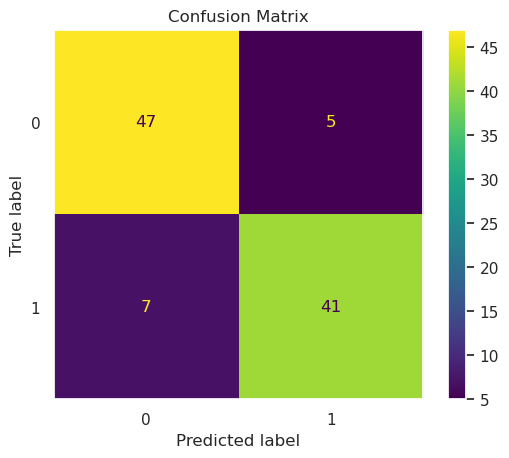

In [24]:
# calculate accuracy when model is used on test data
accuracy = model.score(X_test[feat], y_test)
test_predictions = model.predict(X_test[feat])

# create and plot confusion matrix and print the predictive ability of the model using test data 
confusion=confusion_matrix(y_test, test_predictions, labels=model.classes_)
print(f' accuracy of model is {accuracy*100:.2f}%')

# plot confusion matrix using ConfusionMatrixDisplay using array generated by confusion_matrix
# set display_labels by .classes_ attribute of the model object
disp=ConfusionMatrixDisplay(confusion,display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.grid(False)

Overall accuracy of the model is 88%.  Next will look at other more specfic metrics to answer more specific predictions of the model such as:

* What are the chances of a patient receiving a positive result and acutally having the disease?
* Chance patient recieves a negative result but actually has the disease?

To answer such questions we will need to use the following [metrics](https://geekymedics.com/sensitivity-specificity-ppv-and-npv/):

* Sensitivity is the probability of a test to correctly identify patients with the disease.
* Specificity is the probability of a test to correctly identify patients without the disease.
* PPV is the probability following a positive test result that the patient will truly have the disease.
* NPV is the probability following a negative test result that the patient will truly does not have the disease.

In [25]:
# True Positives
tp=sum((y_test==1)&(test_predictions==1))
# False Negatives
fn=sum((y_test==1)&(test_predictions==0))
# True Negatives
tn=sum((y_test==0)&(test_predictions==0))
# False Positives
fp=sum((y_test==0)&(test_predictions==1))

# calculate metrics
sensitivity=tp/(tp+fn) # tp=true_positive, fn=false_negative
specificity=tn/(tn+fp) # tn=true_negative, fp=false_positive
ppv=tp/(tp+fp)
npv=tn/(tn+fn)

print(f'sensitivity = {sensitivity*100:.2f}%, specificity = {specificity*100:.2f}%, ppv = {ppv*100:.2f}%, and npv = {npv*100:.2f}%')

sensitivity = 85.42%, specificity = 90.38%, ppv = 89.13%, and npv = 87.04%


<a id='Con'></a>
## Conclusion

The final model accuracy was 88% when testing the test data.  

* The model is able to correctly predict 85.42% of patients who have the disease.
* The model is able to correctly predict 90.38% of patients who do not have the disease.
* The probability that a patient that receives a positive test result whom truly has the disease is 89.13%
* The probability that a patient that receives a negative test result whom truly does not has the disease is 87.04%

Overall the model is moderately better at identifying patients without the disease vs identifying patients with disease.

While the results look good overall the dataset itself is fairly small covering only 303 patients.  If the size dataset was increased dramatically using ten features may require too much computing power; the solution in this situation might be to decrease the amount of features used which may decrease the overall accuracy of the model.
